In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('train.csv',encoding = 'utf-8')
test = pd.read_csv('test.csv',encoding = 'utf-8')

In [3]:
train_df =train.copy()
train_df = train_df.replace([' -  ','0',0,np.nan],np.nan)

In [4]:
train_df['总单元'] = train_df['总单元'].fillna(train_df['总单元'].mode()[0])
train_df['居住单元'] = train_df['居住单元'].fillna(train_df['居住单元'].mode()[0])
train_df['总平方英尺'] = train_df['总平方英尺'].astype('float64')
#train_df['土地平方英尺'] = train_df['土地平方英尺'].astype('float64')
train_df['总平方英尺'] = train_df['总平方英尺'].fillna(train_df.groupby('居住单元')['总平方英尺'].transform('mean'))
#train_df['土地平方英尺'] = train_df['土地平方英尺'].fillna(train_df.groupby('居住单元')['土地平方英尺'].transform('mean'))
train_df['总平方英尺'] = train_df['总平方英尺'].fillna(train_df['总平方英尺'].mode()[0])
#train_df['土地平方英尺'] = train_df['土地平方英尺'].fillna(train_df['土地平方英尺'].mode()[0])
train_df['邮编'] = train_df['邮编'].astype('float64')
train_df['邮编'] = train_df['邮编'].fillna(train_df['邮编'].mode()[0])
train_df['修建年份'] = train_df['修建年份'].astype('float64')
train_df['修建年份'] = train_df['修建年份'].fillna(train_df['修建年份'].mode()[0])
train_df['出售价格'] = train_df['出售价格'].astype('float64')
train_df['出售价格'] = train_df['出售价格'].fillna(0)
#这个公寓号真的是傻逼中的傻逼
train_df['公寓号'] = train_df['公寓号'].fillna(train_df['公寓号'].mode()[0])
train_df = train_df.drop(train_df[train_df['出售价格'] == 0].index)
train_df = train_df.reset_index()

In [5]:
y = train_df['出售价格']
#关于为什么删掉出售日期的解释:解释性很差
train_df = train_df.drop(columns=['商业单元','出售价格','土地平方英尺','index','地役权','出售日期'])

In [6]:
num_cols = [i for i in train_df.columns if train_df[i].dtype in ['int64', 'float32','float64']]
cat_cols = [i for i in train_df.columns if train_df[i].dtype == 'object']

In [7]:
def target_encoding(target_feature,df):
    if len(cat_cols) == 0:
        return 'All features are encoded'
    target_std = df[target_feature].std()
    for col in cat_cols:
        encoded_std = df.groupby(col)[target_feature].mean().std()
        if target_std < encoded_std:
            df[col] = df.groupby(col)[target_feature].transform('mean')
            cat_cols.remove(col)
            te_cols.append(col)

In [8]:
te_cols = []
for col in num_cols:
    target_encoding(col,train_df)

In [9]:
for col in cat_cols:
    dummies = pd.get_dummies(train_df[col], prefix = col).astype('int32')
    train_df = pd.concat([train_df, dummies], axis = 1)
train_df = train_df.drop(columns = cat_cols)

In [147]:
from sklearn import manifold
X_tsne = manifold.TSNE(n_components=2,random_state=42,verbose = 2,init='pca').fit_transform(train_df)

D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 38433 samples in 0.001s...
[t-SNE] Computed neighbors for 38433 samples in 17.521s...
[t-SNE] Computed conditional probabilities for sample 1000 / 38433
[t-SNE] Computed conditional probabilities for sample 2000 / 38433
[t-SNE] Computed conditional probabilities for sample 3000 / 38433
[t-SNE] Computed conditional probabilities for sample 4000 / 38433
[t-SNE] Computed conditional probabilities for sample 5000 / 38433
[t-SNE] Computed conditional probabilities for sample 6000 / 38433
[t-SNE] Computed conditional probabilities for sample 7000 / 38433
[t-SNE] Computed conditional probabilities for sample 8000 / 38433
[t-SNE] Computed conditional probabilities for sample 9000 / 38433
[t-SNE] Computed conditional probabilities for sample 10000 / 38433
[t-SNE] Computed conditional probabilities for sample 11000 / 38433
[t-SNE] Computed conditional probabilities for sample 12000 / 38433
[t-SNE] Computed conditional probabilities for sa

D:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 86.5866623, gradient norm = 0.0048625 (50 iterations in 75.258s)
[t-SNE] Iteration 100: error = 86.0535431, gradient norm = 0.0041355 (50 iterations in 73.790s)
[t-SNE] Iteration 150: error = 85.2531128, gradient norm = 0.0035535 (50 iterations in 69.627s)
[t-SNE] Iteration 200: error = 84.3229294, gradient norm = 0.0036715 (50 iterations in 67.976s)
[t-SNE] Iteration 250: error = 83.2734680, gradient norm = 0.0029990 (50 iterations in 64.403s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.273468
[t-SNE] Iteration 300: error = 3.5947804, gradient norm = 0.0014098 (50 iterations in 66.196s)
[t-SNE] Iteration 350: error = 3.1793756, gradient norm = 0.0006925 (50 iterations in 67.135s)
[t-SNE] Iteration 400: error = 2.9661782, gradient norm = 0.0004146 (50 iterations in 71.120s)
[t-SNE] Iteration 450: error = 2.8128953, gradient norm = 0.0003404 (50 iterations in 73.378s)
[t-SNE] Iteration 500: error = 2.6957457, gradient norm = 0.000

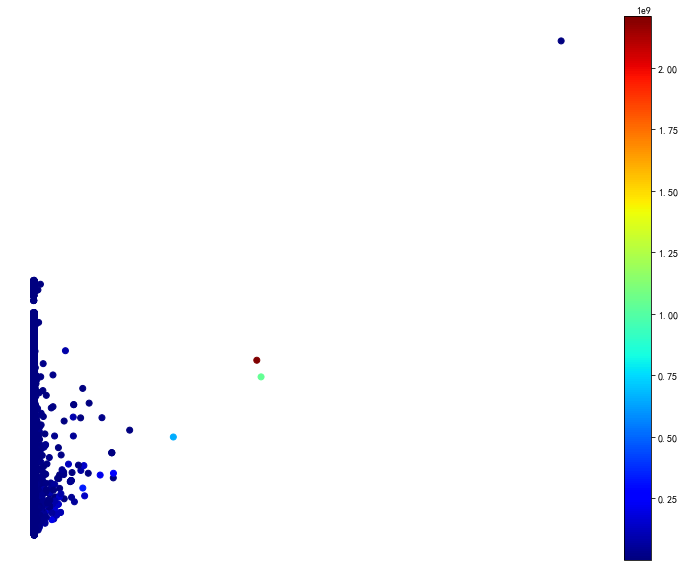

In [148]:
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()
#全都堆在一起了，和pca完全是一个结果 可以用shap看到更加具体的特征的影响，

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state= 42 )

In [11]:
#标准化办法
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
def plot_variance(pca, width = 8, dpi = 100):
    #create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    #Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel = 'Component', title = '% Explained Variance', ylim = (0.0, 1.0))
    #Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], 'o-')
    axs[1].set(xlabel = 'Component', title = '% Cumulative Variance', ylim = (0.0, 1.0))
    #Set Up Figure
    fig.set(figwidth = 12, dpi = 100)
    return axs

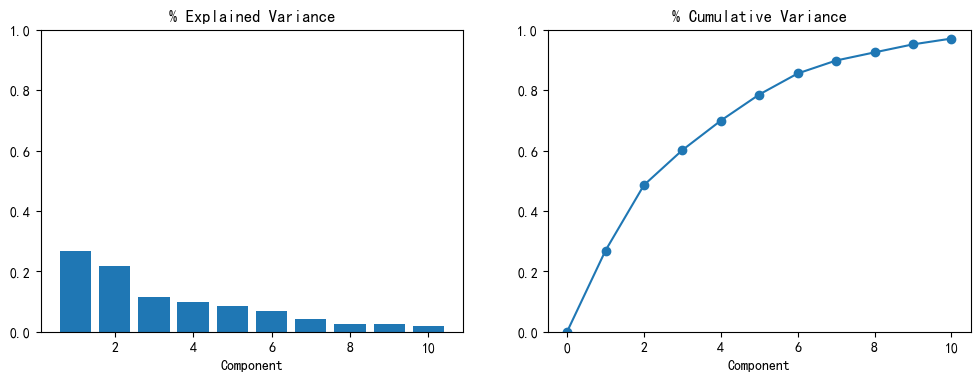

In [14]:
plot_variance(pca)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import shap

In [15]:
rfr = RandomForestRegressor(n_estimators= 110, random_state = 0)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [16]:
print("RMSE:",metrics.mean_squared_error(y_test, y_pred)**0.5)

RMSE: 4729399.907311081


In [ ]:
X = train_df[num_cols].copy()
shap_df = pd.concat([train_df, X], axis = 1)
X_shap, X_val, y_shap, y_val = train_test_split(shap_df, y, train_size = 0.8, random_state = 0)
shap_model = RandomForestRegressor(random_state = 0).fit(X_shap, y_shap)
explainer = shap.TreeExplainer(shap_model)
shap_values = explainer.shap_values(X_val)

In [ ]:
shap.summary_plot(shap_values, X_val, plot_size = (16, 8))

In [110]:
#得到结果
test_df = test.copy()
test_df = test_df.replace([' -  ',' -  ','0',0,np.nan],np.nan)
missing = train_df.isnull().sum()[train_df.isnull().sum() > 0]
missing_df = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train_df)}).sort_values(by = 'NaN_percentage', ascending = False)

In [111]:
test_df['总单元'] = test_df['总单元'].fillna(test_df['总单元'].mode()[0])
test_df['居住单元'] = test_df['居住单元'].fillna(test_df['居住单元'].mode()[0])
test_df['总平方英尺'] = test_df['总平方英尺'].astype('float64')
#test_df['土地平方英尺'] = test_df['土地平方英尺'].astype('float64')
test_df['总平方英尺'] = test_df['总平方英尺'].fillna(test_df.groupby('居住单元')['总平方英尺'].transform('mean'))
#test_df['土地平方英尺'] = test_df['土地平方英尺'].fillna(test_df.groupby('居住单元')['土地平方英尺'].transform('mean'))
test_df['总平方英尺'] = test_df['总平方英尺'].fillna(test_df['总平方英尺'].mode()[0])
#test_df['土地平方英尺'] = test_df['土地平方英尺'].fillna(test_df['土地平方英尺'].mode()[0])
test_df['邮编'] = test_df['邮编'].astype('float64')
test_df['邮编'] = test_df['邮编'].fillna(test_df['邮编'].mode()[0])
test_df['修建年份'] = test_df['修建年份'].astype('float64')
test_df['修建年份'] = test_df['修建年份'].fillna(test_df['修建年份'].mode()[0])
#这个公寓号真的是傻逼中的傻逼
test_df['公寓号'] = test_df['公寓号'].fillna(test_df['公寓号'].mode()[0])
test_df = test_df.reset_index()

In [112]:
test_df = test_df.drop(columns=['商业单元','土地平方英尺','index','地役权'])
num_cols = [i for i in test_df.columns if test_df[i].dtype in ['int64', 'float32','float64']]
cat_cols = [i for i in test_df.columns if test_df[i].dtype == 'object']

In [113]:
te_cols = []
for col in num_cols:
    target_encoding(col,test_df)

In [114]:
for col in cat_cols:
    dummies = pd.get_dummies(test_df[col], prefix = col).astype('int32')
    test_df = pd.concat([test_df, dummies], axis = 1)
test_df = test_df.drop(columns = cat_cols)

In [115]:
X_pre = test_df.copy()
X_pre = sc.fit_transform(X_pre)
X_pre = pca.fit_transform(X_pre)

In [116]:
y_pre = rfr.predict(X_pre)

In [117]:
df = pd.DataFrame(y_pre)
df.to_csv('myfile.csv')